## Корреляционный анализ потребления тепловой энергии по зонам города Астаны, визуализация на карте. 

## 1. Введение

Мы берем из data колонку "Тепловая энергия ГКал" как наш target<br>
data_weather температура окружающей среды<br>
Мы используем модели линейной регресии, desicion tree и метод ближайщих соседей, для реализаций модели чтобы найти оптимальную модель, для предиктивного анализа target

## 2. Подготовка Данных

In [1]:
import warnings

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
data = pd.read_excel('data.xls', header = 2)

In [312]:
df = data[['Unnamed: 1', 'Unnamed: 8']]

In [313]:
df = df.iloc[6:]

df.columns = ['Дата', 'Тепловая Энергия ГКал']

In [314]:
df = df.iloc[:121]

In [315]:
df.index -= 6
df

,Дата,Тепловая Энергия ГКал
0,01.01.16,1.21
1,02.01.16,1.19
2,03.01.16,1.16
3,04.01.16,1.01
4,05.01.16,1.05
...,...,...
116,26.04.16,0
117,27.04.16,0
118,28.04.16,0
119,29.04.16,0


In [316]:
#температура окружающей среды из датасета data_weather
temp = pd.read_csv('data_weather.csv')
temp.temperature = temp.temperature.astype(int)

In [317]:
temperature = pd.DataFrame(columns=['date', 'max_temp', 'min_temp'])
temperature

,date,max_temp,min_temp


In [318]:
temp

,datetime,sky,temperature,wind_direction,wind_velocity,p
0,1/1/2016 00:00,"ясно, без осадков",-21,СВ,3 м/с,738
1,1/1/2016 03:00,"ясно, без осадков",-22,ВСВ,3 м/с,738
2,1/1/2016 06:00,"малооблачно, без осадков",-21,ВСВ,3 м/с,737
3,1/1/2016 09:00,"ясно, без осадков",-20,СВ,4 м/с,735
4,1/1/2016 12:00,"пасмурно, без осадков",-19,ВСВ,5 м/с,734
...,...,...,...,...,...,...
1084,30/4/2016 12:00,"пасмурно, без осадков",14,С,2 м/с,740
1085,30/4/2016 15:00,"облачно, без осадков",15,ЮЗ,2 м/с,739
1086,30/4/2016 18:00,"малооблачно, без осадков",15,З,2 м/с,738
1087,30/4/2016 21:00,"малооблачно, без осадков",12,ЮЮЗ,1 м/с,737


In [319]:
temp['date'] = [i.split(' ')[0] for i in temp['datetime']]

In [320]:
temp

,datetime,sky,temperature,wind_direction,wind_velocity,p,date
0,1/1/2016 00:00,"ясно, без осадков",-21,СВ,3 м/с,738,1/1/2016
1,1/1/2016 03:00,"ясно, без осадков",-22,ВСВ,3 м/с,738,1/1/2016
2,1/1/2016 06:00,"малооблачно, без осадков",-21,ВСВ,3 м/с,737,1/1/2016
3,1/1/2016 09:00,"ясно, без осадков",-20,СВ,4 м/с,735,1/1/2016
4,1/1/2016 12:00,"пасмурно, без осадков",-19,ВСВ,5 м/с,734,1/1/2016
...,...,...,...,...,...,...,...
1084,30/4/2016 12:00,"пасмурно, без осадков",14,С,2 м/с,740,30/4/2016
1085,30/4/2016 15:00,"облачно, без осадков",15,ЮЗ,2 м/с,739,30/4/2016
1086,30/4/2016 18:00,"малооблачно, без осадков",15,З,2 м/с,738,30/4/2016
1087,30/4/2016 21:00,"малооблачно, без осадков",12,ЮЮЗ,1 м/с,737,30/4/2016


In [321]:
temp = temp.loc[:1088]

In [322]:
temp['date'] = temp['date'].astype(str)

In [323]:
temp

,datetime,sky,temperature,wind_direction,wind_velocity,p,date
0,1/1/2016 00:00,"ясно, без осадков",-21,СВ,3 м/с,738,1/1/2016
1,1/1/2016 03:00,"ясно, без осадков",-22,ВСВ,3 м/с,738,1/1/2016
2,1/1/2016 06:00,"малооблачно, без осадков",-21,ВСВ,3 м/с,737,1/1/2016
3,1/1/2016 09:00,"ясно, без осадков",-20,СВ,4 м/с,735,1/1/2016
4,1/1/2016 12:00,"пасмурно, без осадков",-19,ВСВ,5 м/с,734,1/1/2016
...,...,...,...,...,...,...,...
1084,30/4/2016 12:00,"пасмурно, без осадков",14,С,2 м/с,740,30/4/2016
1085,30/4/2016 15:00,"облачно, без осадков",15,ЮЗ,2 м/с,739,30/4/2016
1086,30/4/2016 18:00,"малооблачно, без осадков",15,З,2 м/с,738,30/4/2016
1087,30/4/2016 21:00,"малооблачно, без осадков",12,ЮЮЗ,1 м/с,737,30/4/2016


In [324]:
current_day = temp.loc[0, 'date']
days_uniq = temp['date'].unique().tolist()
for day in tqdm(days_uniq):
    temps_list = temp[temp['date'] == day]['temperature'].tolist()
    r = pd.DataFrame({'date': [day],
                      'max_temp': [max(temps_list)], 
                      'min_temp': [min(temps_list)]
                     })
    temperature = temperature.append(r, ignore_index = True)

  0%|          | 0/121 [00:00<?, ?it/s]

In [325]:
temperature

,date,max_temp,min_temp
0,1/1/2016,-17,-22
1,2/1/2016,-15,-22
2,3/1/2016,-15,-22
3,4/1/2016,-11,-18
4,5/1/2016,-13,-18
...,...,...,...
116,26/4/2016,16,2
117,27/4/2016,15,5
118,28/4/2016,11,2
119,29/4/2016,13,2


In [326]:
df

,Дата,Тепловая Энергия ГКал
0,01.01.16,1.21
1,02.01.16,1.19
2,03.01.16,1.16
3,04.01.16,1.01
4,05.01.16,1.05
...,...,...
116,26.04.16,0
117,27.04.16,0
118,28.04.16,0
119,29.04.16,0


In [327]:
temperature = temperature[['max_temp', 'min_temp']]

In [328]:
temperature

,max_temp,min_temp
0,-17,-22
1,-15,-22
2,-15,-22
3,-11,-18
4,-13,-18
...,...,...
116,16,2
117,15,5
118,11,2
119,13,2


In [329]:
frames = [df, temperature]

result = pd.concat(frames, axis=1)

In [330]:
result

,Дата,Тепловая Энергия ГКал,max_temp,min_temp
0,01.01.16,1.21,-17,-22
1,02.01.16,1.19,-15,-22
2,03.01.16,1.16,-15,-22
3,04.01.16,1.01,-11,-18
4,05.01.16,1.05,-13,-18
...,...,...,...,...
116,26.04.16,0,16,2
117,27.04.16,0,15,5
118,28.04.16,0,11,2
119,29.04.16,0,13,2


In [331]:
# result['Тепловая Энергия ГКал'] = result['Тепловая Энергия ГКал'].astype('float')
# result['max_temp'] = result['max_temp'].astype('int')
# result['min_temp'] = result['min_temp'].astype('int')

In [332]:
result.head()

,Дата,Тепловая Энергия ГКал,max_temp,min_temp
0,01.01.16,1.21,-17,-22
1,02.01.16,1.19,-15,-22
2,03.01.16,1.16,-15,-22
3,04.01.16,1.01,-11,-18
4,05.01.16,1.05,-13,-18


In [333]:
#скорость ветра
wind_df = pd.read_csv('data_weather.csv')
wind_df['wind_velocity'] = wind_df['wind_velocity'].str[:-4]
wind_df.wind_velocity = wind_df.wind_velocity.astype(int)
# wind_df = pd.read_excel('data_wind.xlsx', sheet_name='16')

In [334]:
wind = pd.DataFrame(columns=['date', 'wind'])
wind

,date,wind


In [335]:
wind_df['date'] = [i.split(' ')[0] for i in wind_df['datetime']]
wind_df = wind_df.loc[:1088]
wind_df['date'] = wind_df['date'].astype(str)

In [336]:
wind_df

,datetime,sky,temperature,wind_direction,wind_velocity,p,date
0,1/1/2016 00:00,"ясно, без осадков",-21,СВ,3,738,1/1/2016
1,1/1/2016 03:00,"ясно, без осадков",-22,ВСВ,3,738,1/1/2016
2,1/1/2016 06:00,"малооблачно, без осадков",-21,ВСВ,3,737,1/1/2016
3,1/1/2016 09:00,"ясно, без осадков",-20,СВ,4,735,1/1/2016
4,1/1/2016 12:00,"пасмурно, без осадков",-19,ВСВ,5,734,1/1/2016
...,...,...,...,...,...,...,...
1084,30/4/2016 12:00,"пасмурно, без осадков",14,С,2,740,30/4/2016
1085,30/4/2016 15:00,"облачно, без осадков",15,ЮЗ,2,739,30/4/2016
1086,30/4/2016 18:00,"малооблачно, без осадков",15,З,2,738,30/4/2016
1087,30/4/2016 21:00,"малооблачно, без осадков",12,ЮЮЗ,1,737,30/4/2016


In [337]:
current_day = temp.loc[0, 'date']
days_uniq = temp['date'].unique().tolist()
for day in tqdm(days_uniq):
    wind_list = wind_df[wind_df['date'] == day]['wind_velocity'].tolist()
    r = pd.DataFrame({'date': [day],
                      'wind': [round(sum(wind_list)/len(wind_list))],
                     })
    wind = wind.append(r, ignore_index = True)

  0%|          | 0/121 [00:00<?, ?it/s]

In [338]:
wind

,date,wind
0,1/1/2016,5
1,2/1/2016,3
2,3/1/2016,4
3,4/1/2016,2
4,5/1/2016,2
...,...,...
116,26/4/2016,1
117,27/4/2016,2
118,28/4/2016,2
119,29/4/2016,2


In [339]:
wind_df = wind_df.groupby('datetime', as_index=False).mean()

In [340]:
air_press_df = pd.read_csv('data_weather.csv')
air_press_df['air_press'] = air_press_df['p']
air_press_df.air_press = air_press_df.p.astype(int)

In [341]:
air_press = pd.DataFrame(columns=['date', 'air_press'])
air_press

,date,air_press


In [342]:
air_press_df['date'] = [i.split(' ')[0] for i in air_press_df['datetime']]
air_press_df = air_press_df.loc[:1088]
air_press_df['date'] = air_press_df['date'].astype(str)

In [343]:
air_press_df

,datetime,sky,temperature,wind_direction,wind_velocity,p,air_press,date
0,1/1/2016 00:00,"ясно, без осадков",-21,СВ,3 м/с,738,738,1/1/2016
1,1/1/2016 03:00,"ясно, без осадков",-22,ВСВ,3 м/с,738,738,1/1/2016
2,1/1/2016 06:00,"малооблачно, без осадков",-21,ВСВ,3 м/с,737,737,1/1/2016
3,1/1/2016 09:00,"ясно, без осадков",-20,СВ,4 м/с,735,735,1/1/2016
4,1/1/2016 12:00,"пасмурно, без осадков",-19,ВСВ,5 м/с,734,734,1/1/2016
...,...,...,...,...,...,...,...,...
1084,30/4/2016 12:00,"пасмурно, без осадков",14,С,2 м/с,740,740,30/4/2016
1085,30/4/2016 15:00,"облачно, без осадков",15,ЮЗ,2 м/с,739,739,30/4/2016
1086,30/4/2016 18:00,"малооблачно, без осадков",15,З,2 м/с,738,738,30/4/2016
1087,30/4/2016 21:00,"малооблачно, без осадков",12,ЮЮЗ,1 м/с,737,737,30/4/2016


In [344]:
current_day = temp.loc[0, 'date']
days_uniq = temp['date'].unique().tolist()
for day in tqdm(days_uniq):
    air_press_list = air_press_df[air_press_df['date'] == day]['air_press'].tolist()
    r = pd.DataFrame({'date': [day],
                      'air_press': [round(sum(air_press_list)/len(air_press_list))],
                     })
    air_press = air_press.append(r, ignore_index = True)

  0%|          | 0/121 [00:00<?, ?it/s]

In [345]:
# result['wind'] = wind_df['wind_velocity'][:121]
result['Тепловая Энергия ГКал'] = result['Тепловая Энергия ГКал'].astype('float')
result['Maximum Temperature'] = result['max_temp'].astype('int')
result['Minimum Temperature'] = result['min_temp'].astype('int')
result['Wind Speed'] = wind['wind'].astype('int')
result['Air Pressure'] = air_press['air_press'].astype('int')

In [346]:
result

,Дата,Тепловая Энергия ГКал,max_temp,min_temp,Maximum Temperature,Minimum Temperature,Wind Speed,Air Pressure
0,01.01.16,1.21,-17,-22,-17,-22,5,735
1,02.01.16,1.19,-15,-22,-15,-22,3,738
2,03.01.16,1.16,-15,-22,-15,-22,4,740
3,04.01.16,1.01,-11,-18,-11,-18,2,738
4,05.01.16,1.05,-13,-18,-13,-18,2,738
...,...,...,...,...,...,...,...,...
116,26.04.16,0.00,16,2,16,2,1,735
117,27.04.16,0.00,15,5,15,5,2,732
118,28.04.16,0.00,11,2,11,2,2,732
119,29.04.16,0.00,13,2,13,2,2,735


In [347]:
result = result.rename(columns = {'Тепловая Энергия ГКал': 'Heat Consumption',
                                  'Дата': 'Date'})

### Визуализация данных

Heat Consumption
max_temp
min_temp
Maximum Temperature


IndexError: index 3 is out of bounds for axis 0 with size 3

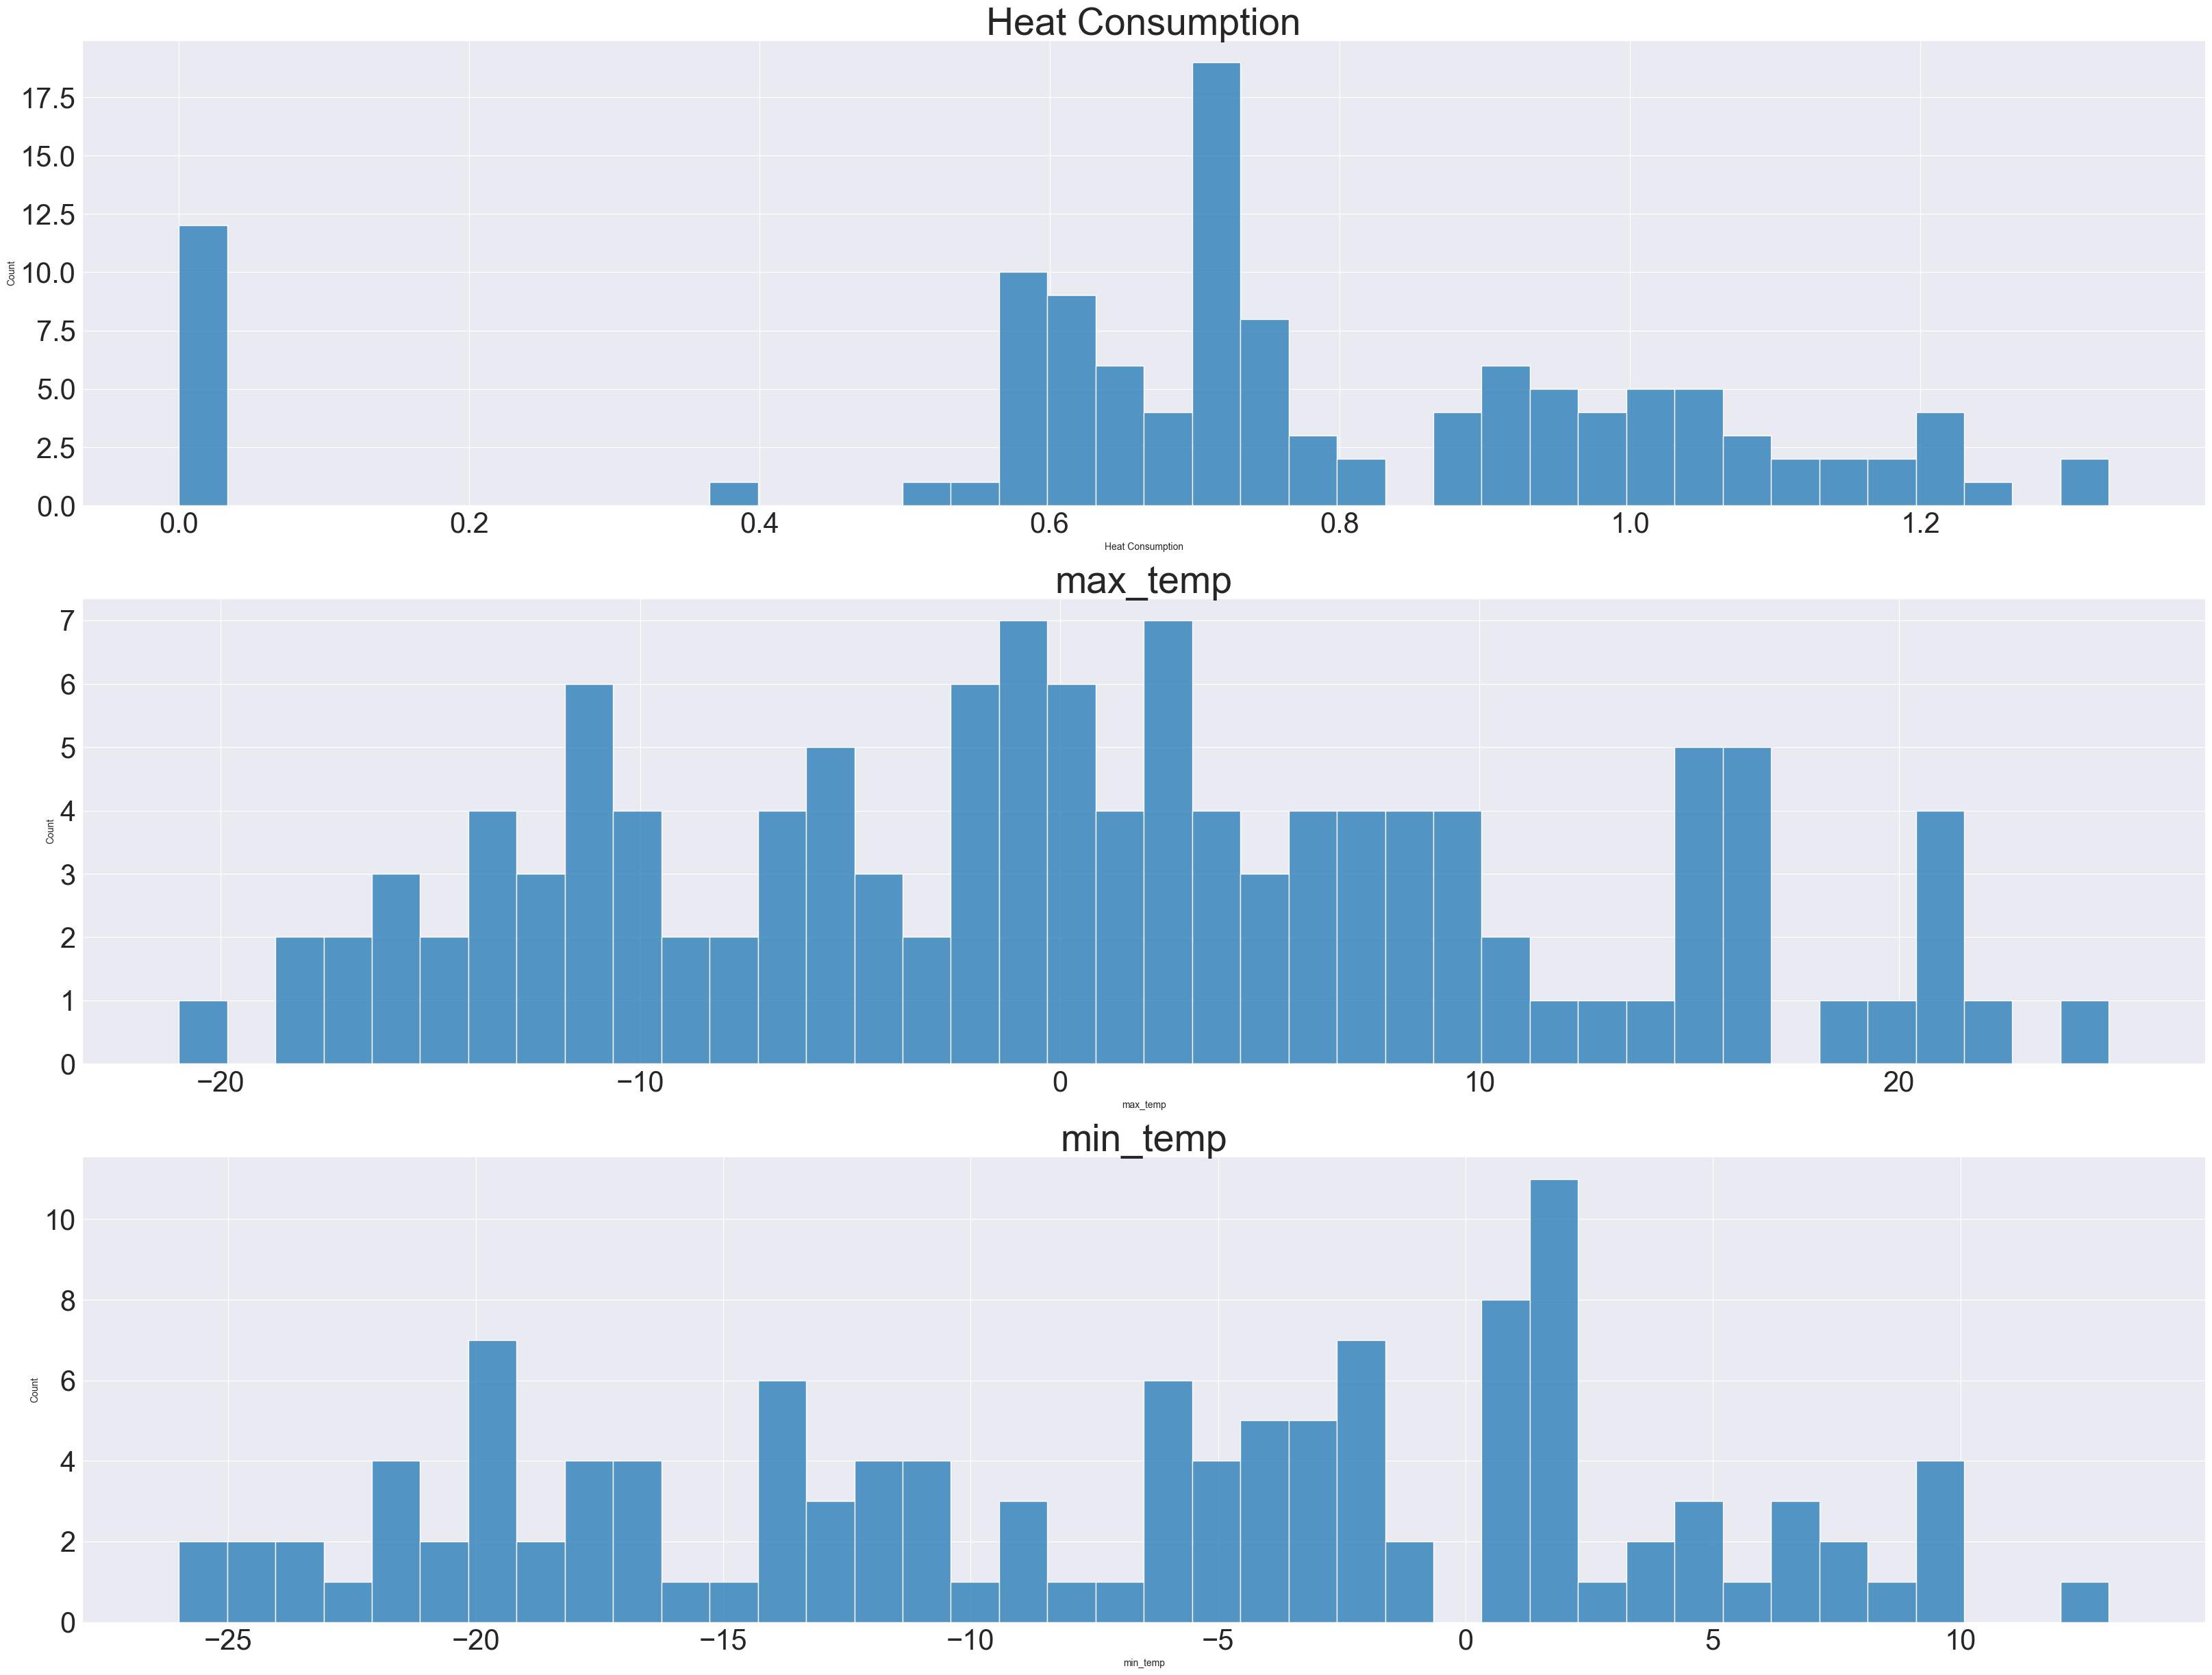

In [348]:
fig, axes = plt.subplots(figsize=(40,30), nrows=3, ncols=1)

cntr = 0
for i in result.columns[1:-1]:
    print(i)
    sns.histplot(result[i], bins=40, ax=axes[cntr])
    axes[cntr].set_title(i, size=40)
    axes[cntr].tick_params(labelsize=30)
    cntr = cntr + 1

plt.tight_layout()

In [354]:
result.describe()

,Heat Consumption,Maximum Temperature,Minimum Temperature,Wind Speed,Air Pressure
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.741653,0.561983,-7.148760,2.429752,735.404959
std,0.316313,10.696489,10.071131,1.302731,6.685280
min,0.000000,-21.000000,-26.000000,1.000000,714.000000
25%,0.610000,-8.000000,-16.000000,2.000000,731.000000
50%,0.730000,0.000000,-6.000000,2.000000,735.000000
75%,0.960000,8.000000,1.000000,3.000000,740.000000
max,1.330000,25.000000,13.000000,6.000000,748.000000


### Correlation

<AxesSubplot: >

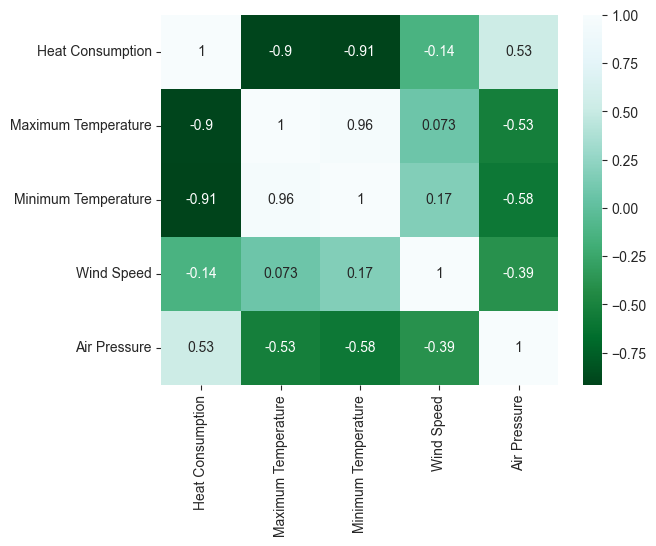

In [91]:
corr = result.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,cmap='BuGn_r')

# Models

### MAX

In [126]:
X = result[['max_temp']]
y = result['Heat Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

kn.fit(X_train, y_train)

y_pred_train = kn.predict(X_train)
y_pred_test_knr_max = kn.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test_kn = metrics.r2_score(y_test, y_pred_test_knr_max)
print(r2_reg_train)
print(r2_reg_test_kn)

0.8400696668443606
0.813878350530478


In [44]:
print(kn.n_neighbors)

5


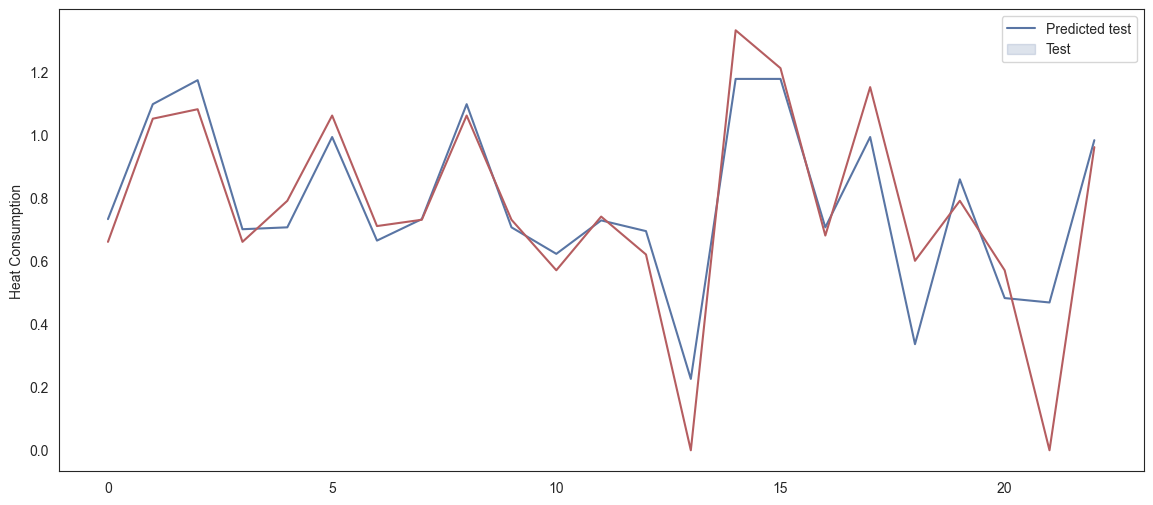

In [128]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y=y_pred_test_knr_max, x=range(len(y_test)), color='#5975a4')
bx = sns.lineplot(y=y_test, x=range(len(y_test)), color='#b55d60')

ax.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
bx.xaxis.grid(False)

sns.set_style("ticks")

plt.show()

Text(0.5, 0, 'y_test')

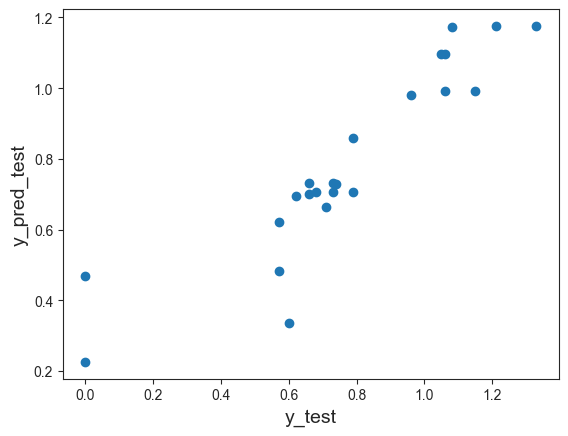

In [129]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_knr_max)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

In [130]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test_dt_max = dt.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test = metrics.r2_score(y_test, y_pred_test_dt_max)
print(r2_reg_train)
print(r2_reg_test)

0.8461623455279378
0.7459504554743444


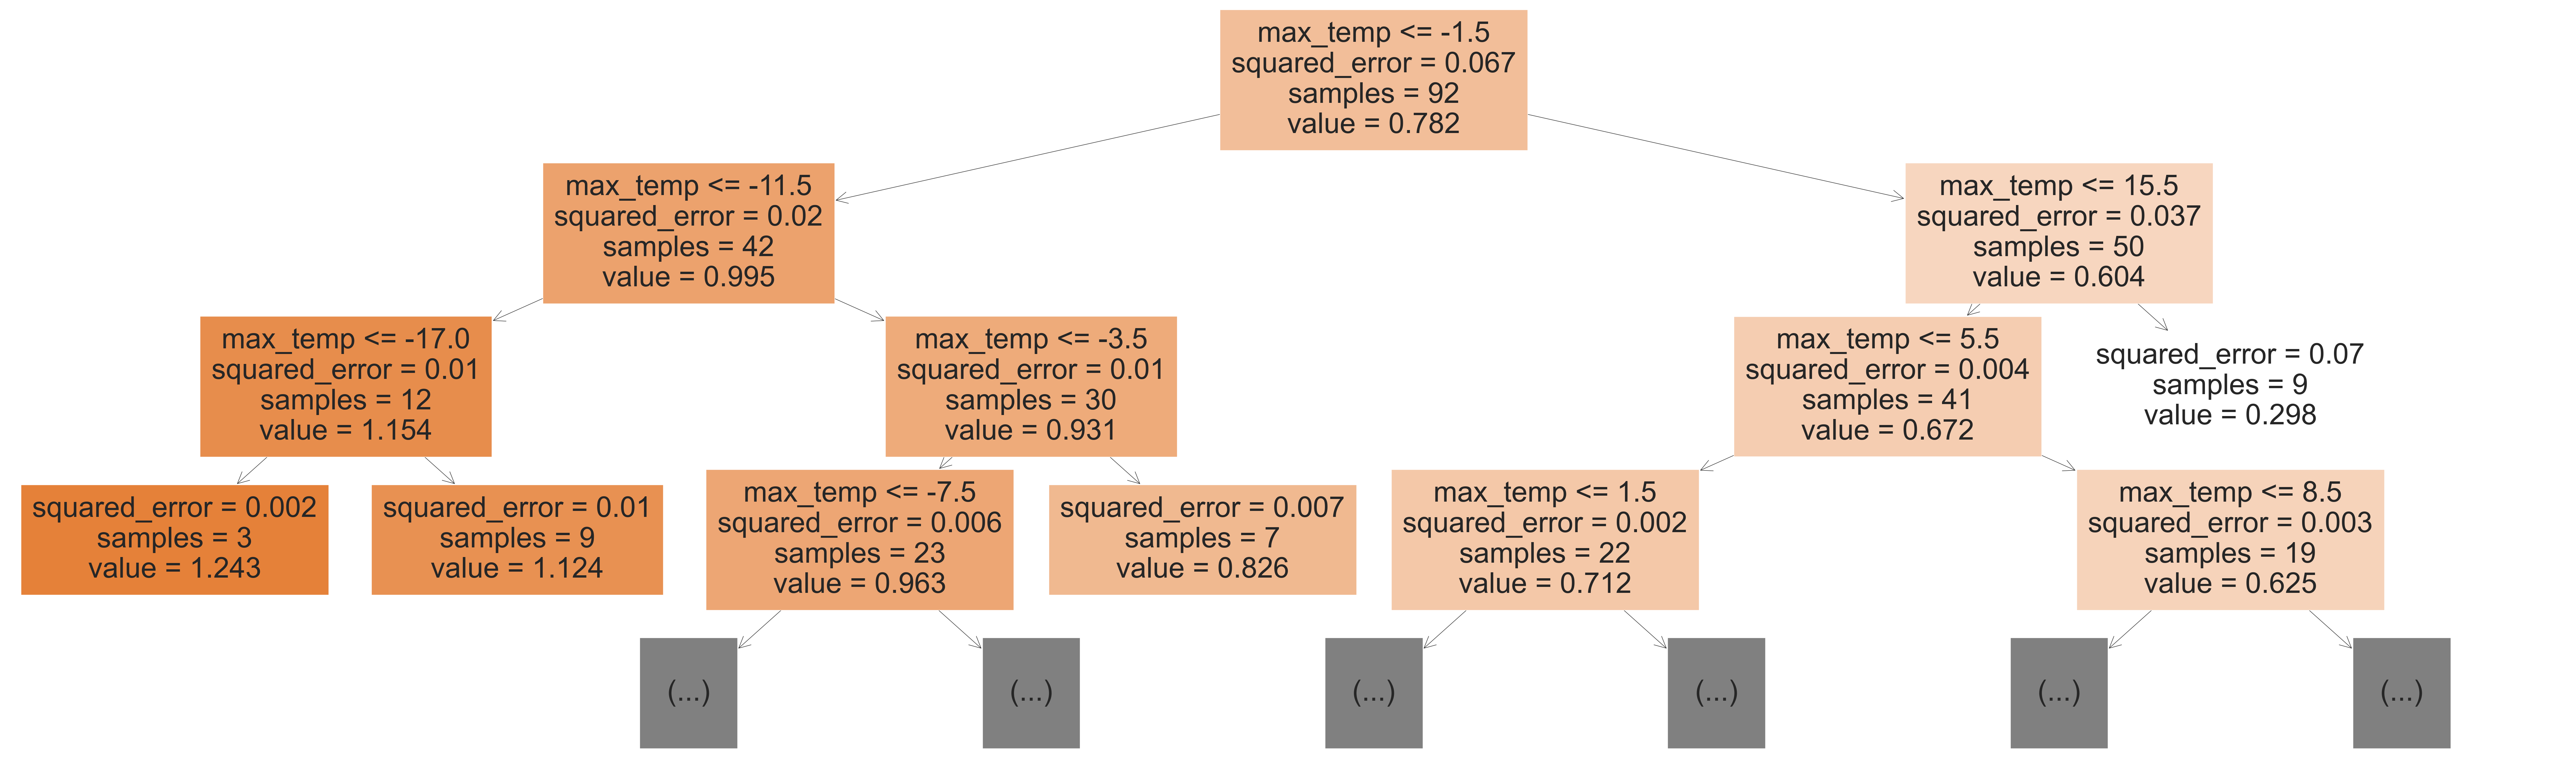

In [131]:
from sklearn.tree import plot_tree

features = ['max_temp', 'Wind Speed', 'Air Pressure']
plt.figure(figsize=(100, 30))
plot_tree(dt, feature_names=features, filled=True, max_depth=3)
plt.show()

In [132]:
print(dt.get_depth())

5


In [133]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [134]:
dt.criterion

'squared_error'

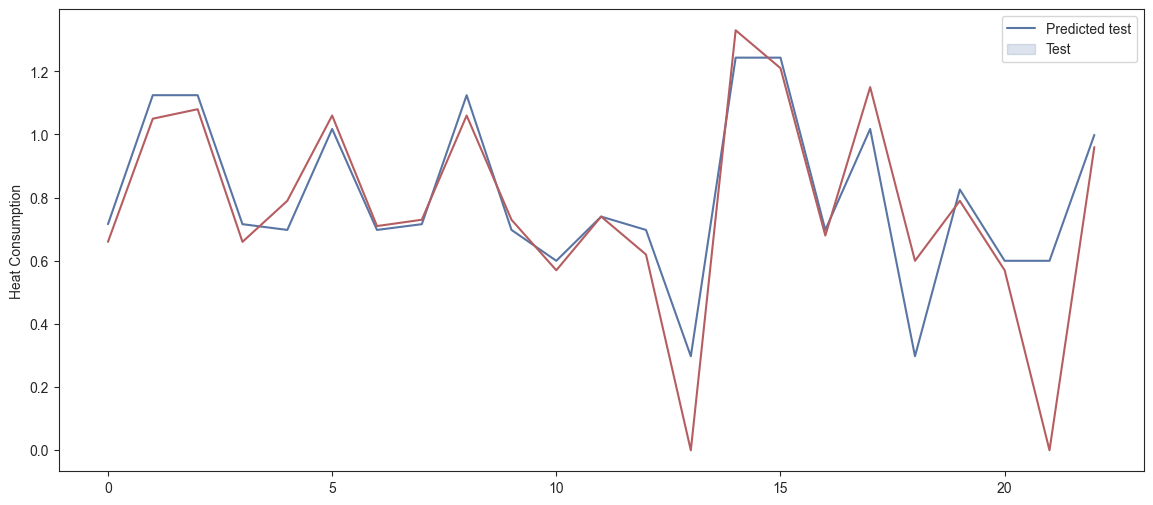

In [135]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y=y_pred_test_dt_max, x=range(len(y_test)), color='#5975a4')
ax = sns.lineplot(y=y_test, x=range(len(y_test)), color='#b55d60')

ax.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

sns.set_style("ticks")

plt.show()

Text(0.5, 0, 'y_test')

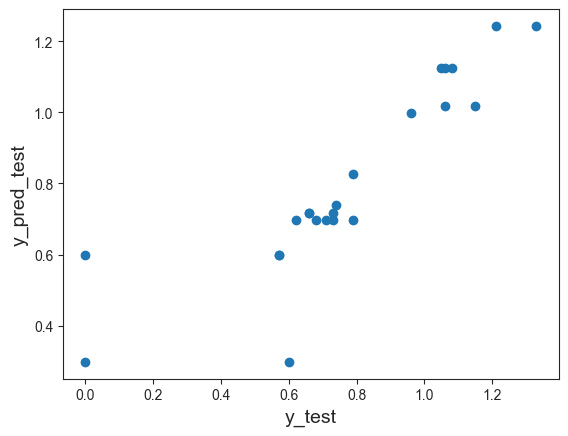

In [136]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_dt_max)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

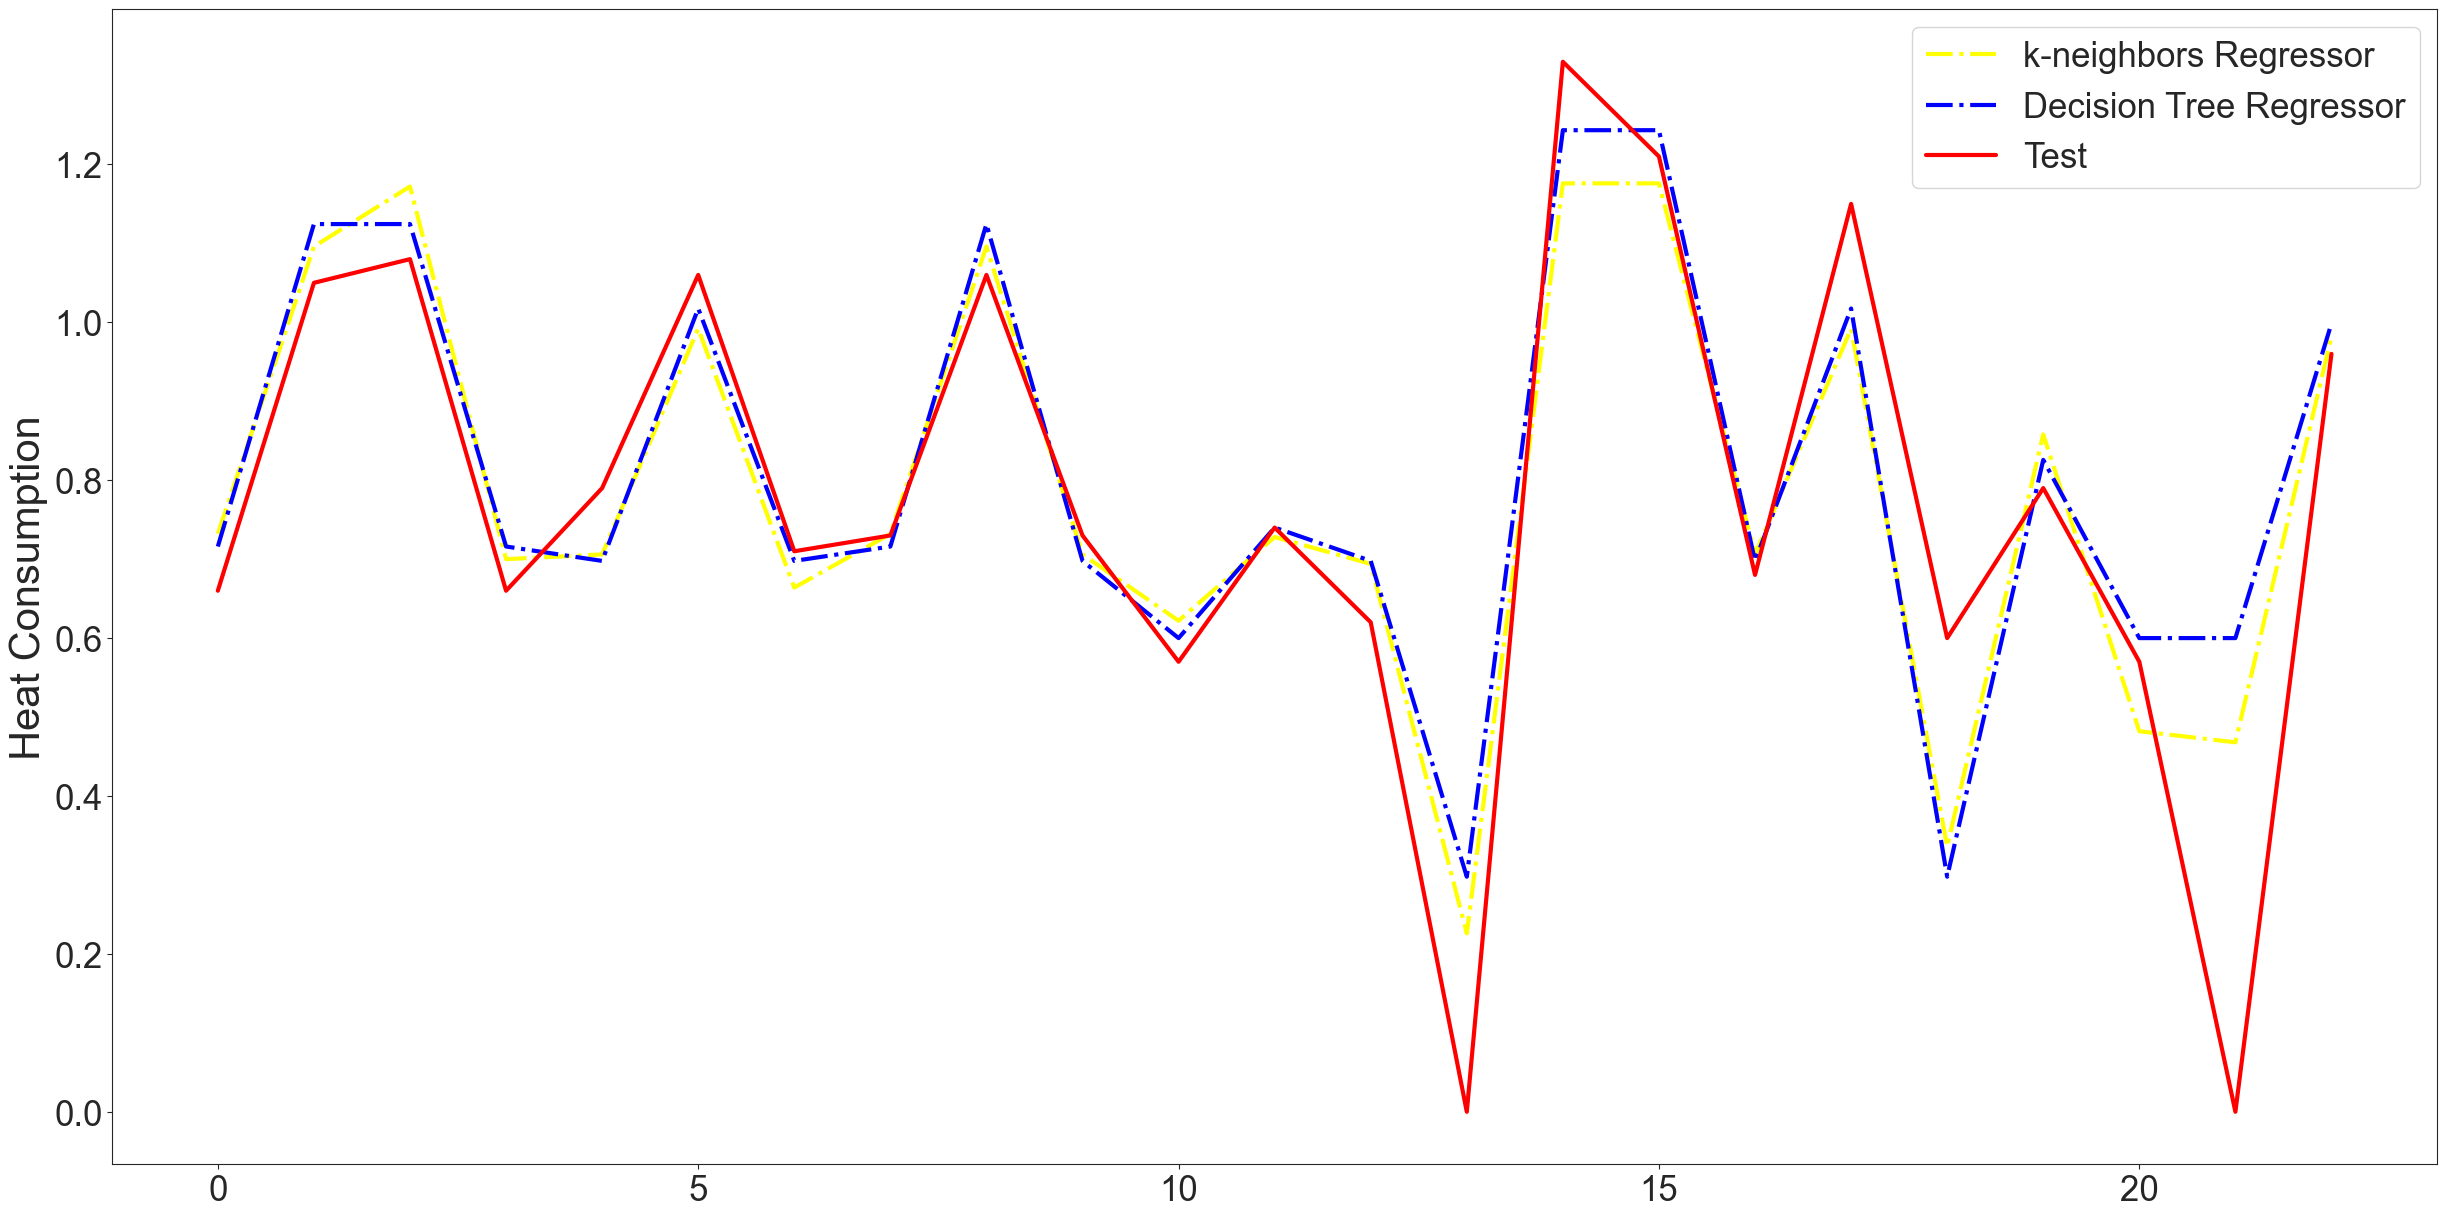

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
plt.plot(range(0, len(y_test), 1), y_pred_test_knr_max, color='yellow', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_pred_test_dt_max, color='blue', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_test, color='red', linewidth='3')
# ax = sns.lineplot(y=y_pred_test_knr_max, x=range(0, len(y_test), 1), color='yellow', linestyle='-.', linewidth='3')
# ax = sns.lineplot(y=y_pred_test_dt_max, x=range(0, len(y_test), 1), color='blue', linestyle='-.', linewidth='3')
# ax = sns.lineplot(y=y_test, x=range(len(y_test)), color='red')
ax.legend(labels=['k-neighbors Regressor', 'Decision Tree', 'Test'])
ax.legend(['k-neighbors Regressor', 'Decision Tree Regressor', 'Test'], fontsize=25)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_ylabel('Heat Consumption', fontsize=30)

sns.set_style("ticks")

plt.show()
fig.savefig('max.png')

### MIN

In [138]:
X = result[['min_temp']]
y = result['Heat Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

kn.fit(X_train, y_train)

y_pred_train = kn.predict(X_train)
y_pred_test_knr_min = kn.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test = metrics.r2_score(y_test, y_pred_test_knr_min)
print(r2_reg_train)
print(r2_reg_test)

0.9123549406705169
0.6694159138720455


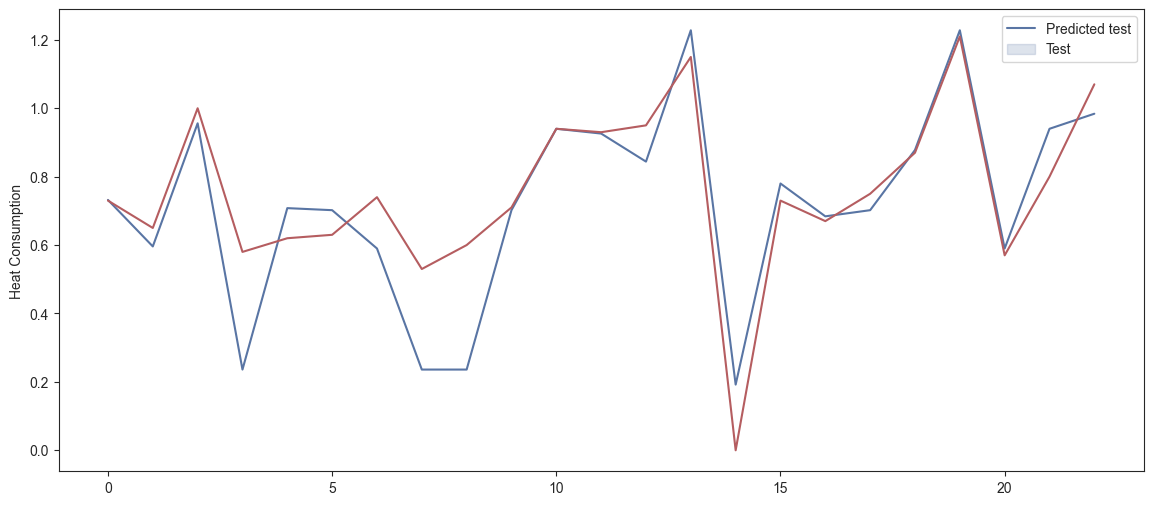

In [140]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y=y_pred_test_knr_min, x=range(len(y_test)), color='#5975a4')
ax = sns.lineplot(y=y_test, x=range(len(y_test)), color='#b55d60')

ax.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

sns.set_style("white")

plt.show()

Text(0.5, 0, 'y_test')

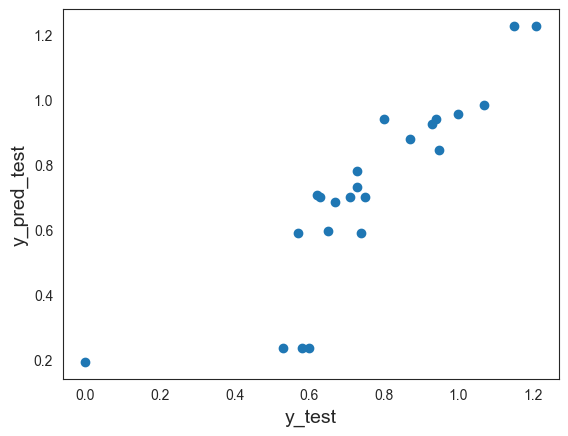

In [141]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_knr_min)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

In [142]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test_dt_min = dt.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test = metrics.r2_score(y_test, y_pred_test_dt_min)
print(r2_reg_train)
print(r2_reg_test)

0.9271249445402262
0.9031624696854775


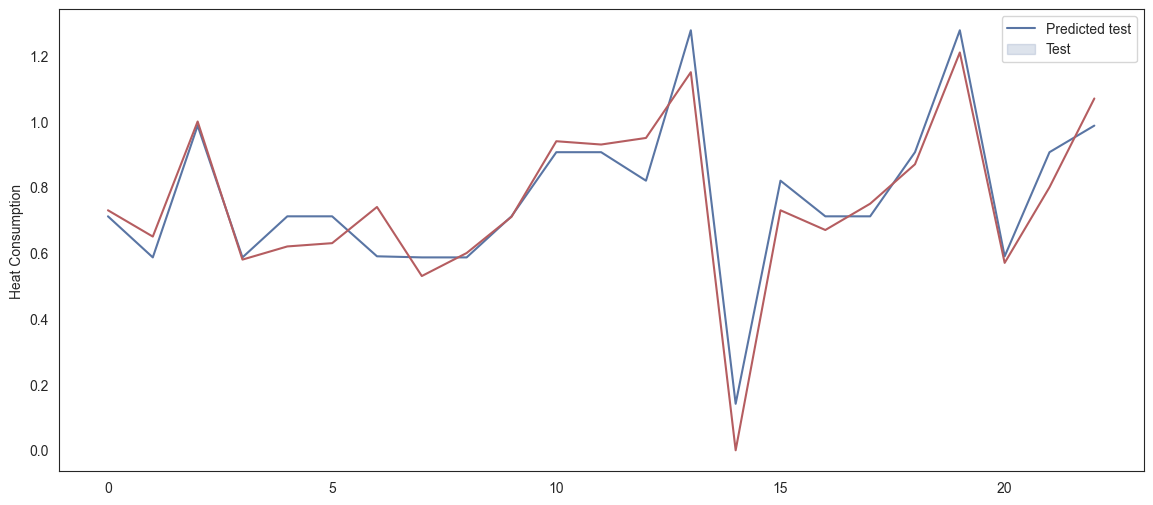

In [143]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y=y_pred_test_dt_min, x=range(len(y_test)), color='#5975a4')
ax = sns.lineplot(y=y_test, x=range(len(y_test)), color='#b55d60')

ax.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

sns.set_style("white")

plt.show()

Text(0.5, 0, 'y_test')

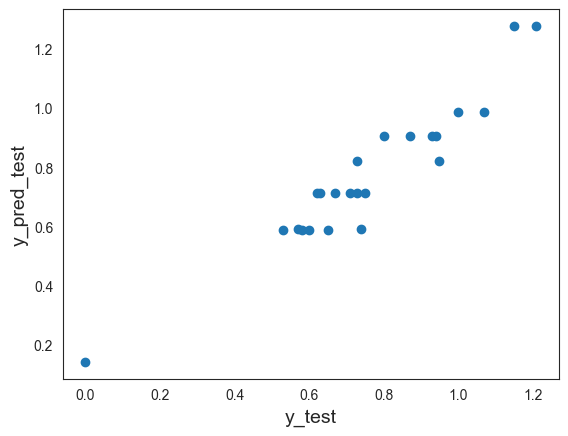

In [144]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_dt_min)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

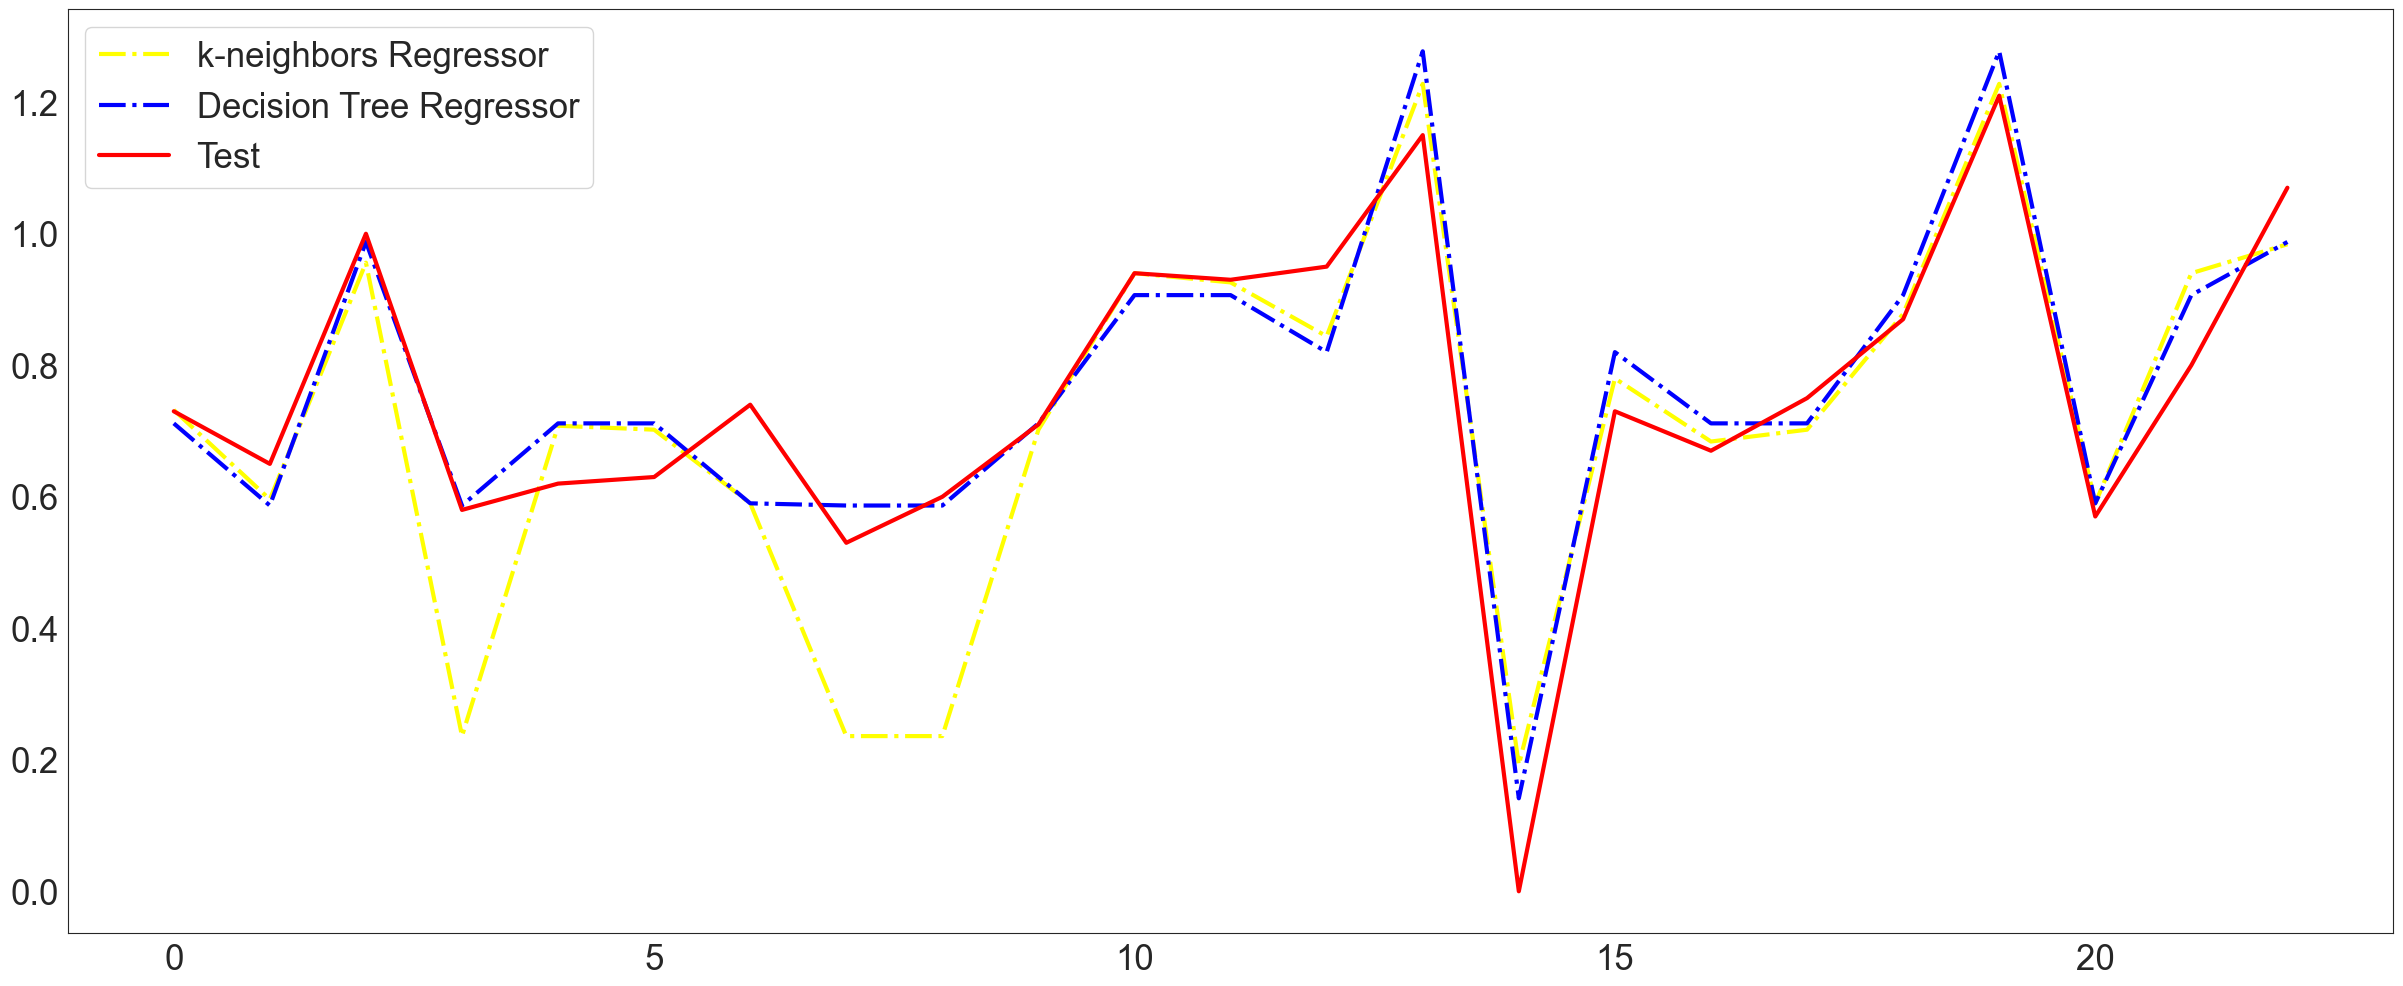

In [145]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(30, 12))
plt.plot(range(0, len(y_test), 1), y_pred_test_knr_min, color='yellow', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_pred_test_dt_min, color='blue', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_test, color='red', linewidth='3')

# ax = sns.lineplot(y=y_pred_test_knr_min, x=range(len(y_test)), color='yellow', linestyle='-.', linewidth='3')#c1b37f
# ax = sns.lineplot(y=y_pred_test_dt_min, x=range(len(y_test)), color='blue', linestyle='-.', linewidth='3')#b55d60
# ax = sns.lineplot(y=y_test, x=range(len(y_test)), color='red')

ax.legend(['k-neighbors Regressor', 'Decision Tree Regressor', 'Test'], fontsize=25)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.yaxis.label.set_size(30)

sns.set_style("white")
# ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=23))

plt.show()
fig.savefig('min.png')

---
#### without wind
|        model        | train | test
|:-------------------:|:-----:|:----
| KNeighborsRegressor | 0.89  | 0.92
|    DecisionTree     | 0.95  | 0.90

---
#### with wind
|        model        | train | test
|:-------------------:|:-----:|:----
| KNeighborsRegressor | 0.93  | 0.83
|    DecisionTree     |  1.0  | 0.41

### MAX & MIN

In [146]:
X = result[['max_temp','min_temp']]
y = result['Heat Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

kn.fit(X_train, y_train)

y_pred_train = kn.predict(X_train)
y_pred_test_knr_min_max = kn.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test = metrics.r2_score(y_test, y_pred_test_knr_min_max)
print(r2_reg_train)
print(r2_reg_test)

0.8842136934820048
0.40555976459446663


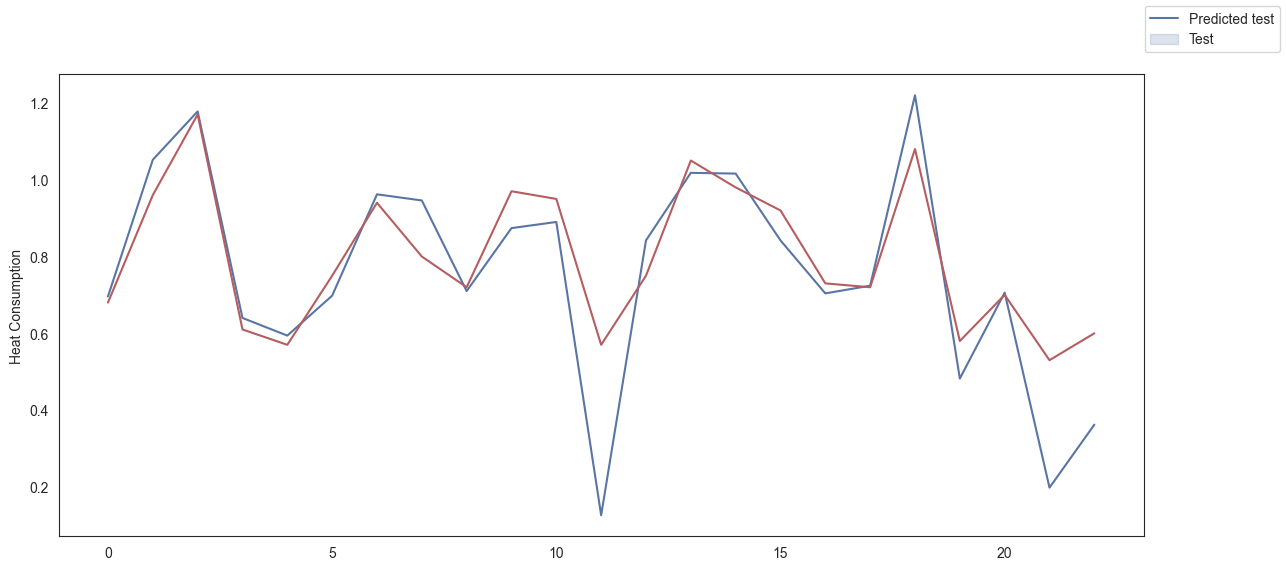

In [148]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y = y_pred_test_knr_min_max, x=range(len(y_test)), color='#5975a4')
ax = sns.lineplot(y = y_test, x=range(len(y_test)), color='#b55d60')

ax.figure.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

sns.set_style("white")

plt.show()

Text(0.5, 0, 'y_test')

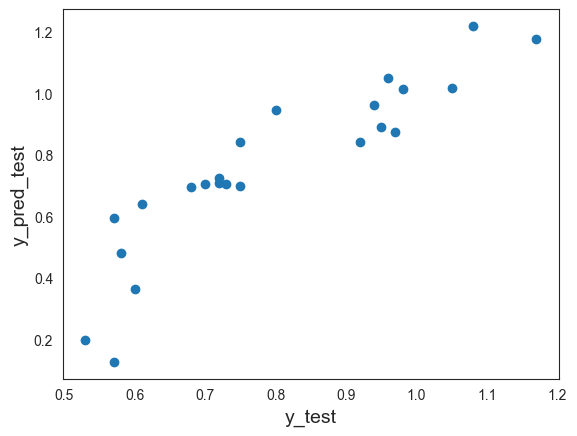

In [149]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_knr_min_max)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

In [150]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test_dt_min_max = dt.predict(X_test)

r2_reg_train = metrics.r2_score(y_train, y_pred_train)
r2_reg_test = metrics.r2_score(y_test, y_pred_test_dt_min_max)
print(r2_reg_train)
print(r2_reg_test)

0.9624467302260812
0.5828366257303219


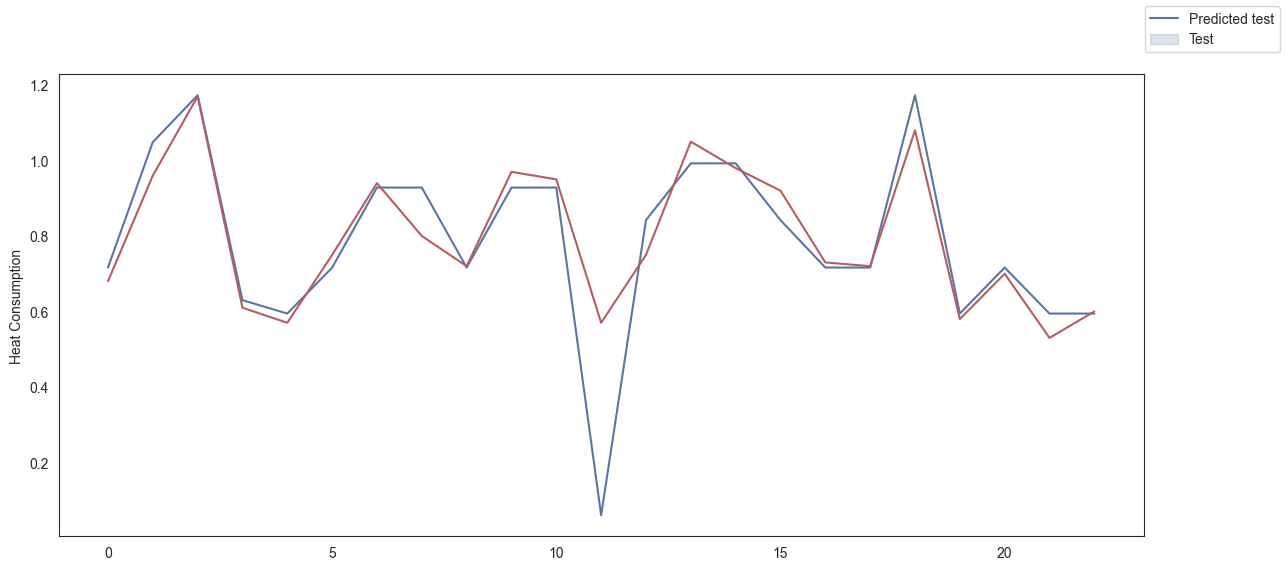

In [151]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(y = y_pred_test_dt_min_max, x=range(len(y_test)), color='#5975a4')
ax = sns.lineplot(y = y_test, x=range(len(y_test)), color='#b55d60')

ax.figure.legend(['Predicted test', 'Test'])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

sns.set_style("white")

plt.show()

Text(0.5, 0, 'y_test')

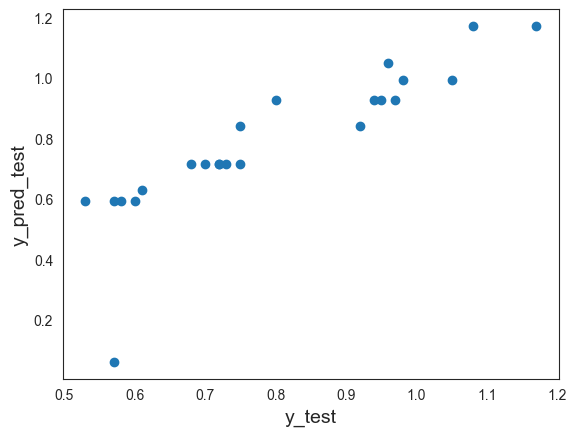

In [152]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test_dt_min_max)
plt.ylabel('y_pred_test', size='14')
plt.xlabel('y_test', size='14')

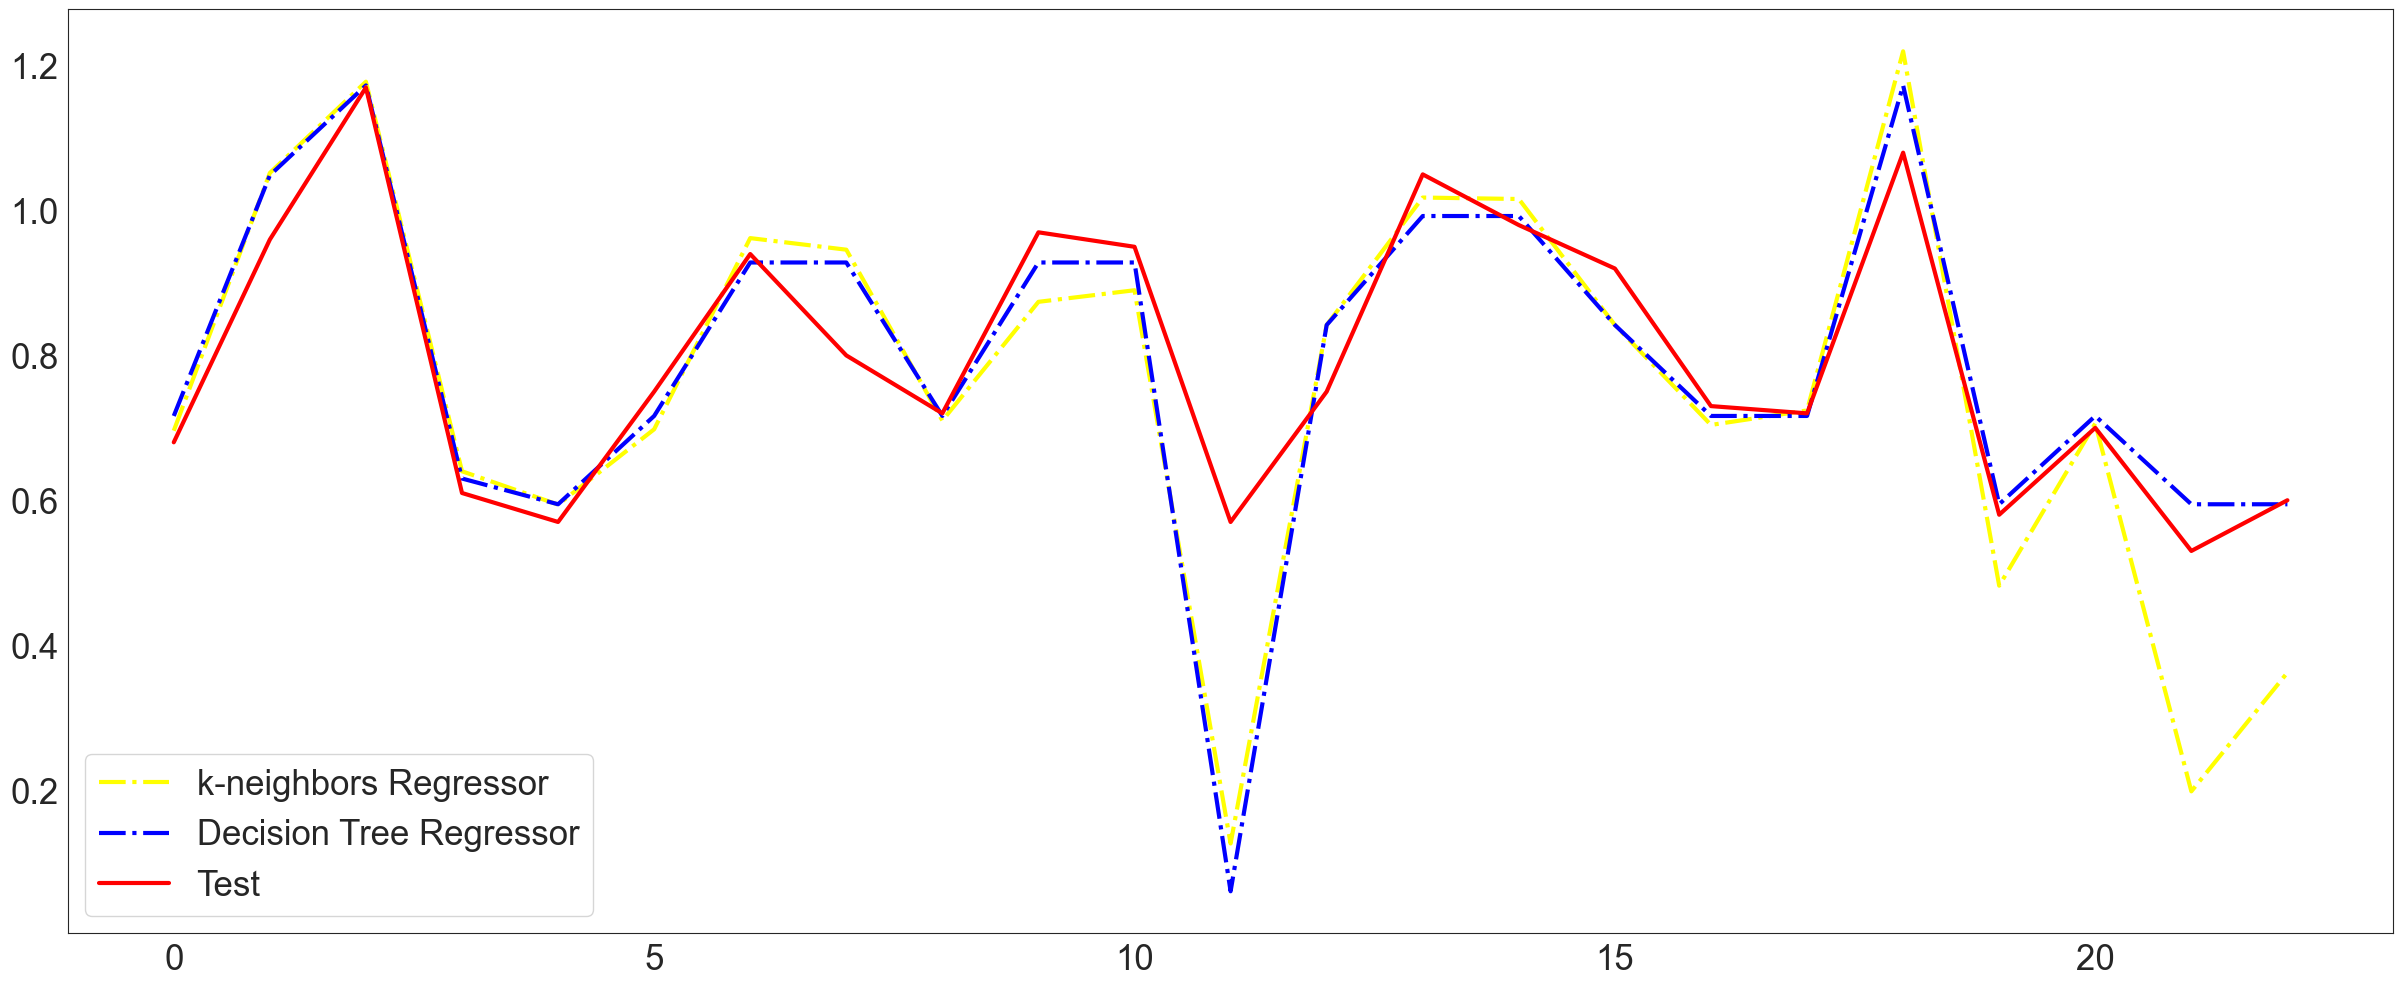

In [153]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(30, 12))
plt.plot(range(0, len(y_test), 1), y_pred_test_knr_min_max, color='yellow', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_pred_test_dt_min_max, color='blue', linestyle='-.', linewidth='3')
plt.plot(range(0, len(y_test), 1), y_test, color='red', linewidth='3')
# ax = sns.lineplot(y = y_pred_test_knr_min_max, x=range(len(y_test)), color='yellow', linestyle='-.', linewidth='3')#c1b37f
# ax = sns.lineplot(y = y_pred_test_dt_min_max, x=range(len(y_test)), color='blue', linestyle='-.', linewidth='3')#b55d60
# ax = sns.lineplot(y = y_test, x=range(len(y_test)), color='red')

ax.legend(['k-neighbors Regressor', 'Decision Tree Regressor', 'Test'], fontsize=25)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.yaxis.label.set_size(30)

sns.set_style("white")
# ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=23))

plt.show()
fig.savefig('max&min.png')

---
##### Comparison of models
#### without wind
|        model        | train | test
|:-------------------:|:-----:|:----
| KNeighborsRegressor | 0.89  | 0.85
|    DecisionTree     | 0.99  | 0.77

---
#### with wind

|        model        | train | test
|:-------------------:|:-----:|:----
| KNeighborsRegressor | 0.86  | 0.79
|    DecisionTree     |  1.0  | 0.92

# С полными данными

In [268]:
data

,01.01.16 - 30.04.16,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Потребитель:,NaN,Акмолинский учеб.курсовой комбинат,NaN,NaN,NaN,NaN,Прибор №:,NaN,4063877 .,Multical (+adapter)
2,NaN,Адрес:,NaN,Женис 36/1 Женис пр. 36/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Дата,Темпе-ратура\nt1\nград,Темпе-ратура\nt2\nград,Разница t1 - t2,"Расход m1, т","Расход m2, т",Разница m1 - m2,Тепло-вая энергия ГКал,Наработка испр\nч,Наработка неисп\nч,Код неисправности
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,NaN,02.02.16,79.25,56.58,22.67,335.369,335.369,0,7.628,24,0,0
65529,NaN,03.02.16,87.15,61.36,25.79,341.226,341.226,0,8.837,24,0,0
65530,NaN,04.02.16,81.8,59.01,22.79,350.407,350.407,0,8.016,24,0,0
65531,NaN,05.02.16,76.02,56.4,19.62,365.604,365.604,0,7.2,24,0,0


In [269]:
index_count = data.loc[data['Unnamed: 1'] == "Адрес:"].index
index_count

Int64Index([    2,   179,   356,   533,   710,   887,  1005,  1123,  1182,
             1359,
            ...
            63899, 64076, 64253, 64430, 64607, 64784, 64961, 65138, 65315,
            65492],
           dtype='int64', length=385)

In [270]:
len(index_count)

385

In [271]:
middle_count = data.loc[data['Unnamed: 1'] == "Среднее"].index
middle_count

Int64Index([  128,   305,   476,   659,   836,   956,  1085,  1171,  1308,
             1485,
            ...
            63848, 64025, 64202, 64379, 64556, 64733, 64910, 65087, 65264,
            65441],
           dtype='int64', length=384)

In [272]:
temperature = pd.DataFrame(columns=['date', 'max_temp', 'min_temp'])

current_day = temp.loc[0, 'date']
days_uniq = temp['date'].unique().tolist()
for day in tqdm(days_uniq):
    temps_list = temp[temp['date'] == day]['temperature'].tolist()
    r = pd.DataFrame({'date': [day],
                      'max_temp': [max(temps_list)], 
                      'min_temp': [min(temps_list)]
                     })
    temperature = temperature.append(r, ignore_index = True)

  0%|          | 0/115 [00:00<?, ?it/s]

In [273]:
temperature['date'] = pd.to_datetime(temperature['date'], format='%d/%m/%Y')
temperature

,date,max_temp,min_temp
0,2016-01-01,-17,-22
1,2016-01-02,-15,-22
2,2016-01-03,-15,-22
3,2016-01-04,-11,-18
4,2016-01-05,-13,-18
...,...,...,...
110,2016-04-20,20,10
111,2016-04-21,21,10
112,2016-04-22,15,9
113,2016-04-23,21,8


In [274]:
temperature

,date,max_temp,min_temp
0,2016-01-01,-17,-22
1,2016-01-02,-15,-22
2,2016-01-03,-15,-22
3,2016-01-04,-11,-18
4,2016-01-05,-13,-18
...,...,...,...
110,2016-04-20,20,10
111,2016-04-21,21,10
112,2016-04-22,15,9
113,2016-04-23,21,8


In [275]:
df_x = df

In [276]:
df_x

,Дата,Тепловая Энергия ГКал
0,01.01.16,1.21
1,02.01.16,1.19
2,03.01.16,1.16
3,04.01.16,1.01
4,05.01.16,1.05
...,...,...
110,20.04.16,0
111,21.04.16,0
112,22.04.16,0
113,23.04.16,0


In [277]:
df.reset_index(drop=True, inplace=True)
df.rename(columns={'Тепловая Энергия ГКал': 'Heat Consumption GCalories'}, inplace=True)
df

,Дата,Heat Consumption GCalories
0,01.01.16,1.21
1,02.01.16,1.19
2,03.01.16,1.16
3,04.01.16,1.01
4,05.01.16,1.05
...,...,...
110,20.04.16,0
111,21.04.16,0
112,22.04.16,0
113,23.04.16,0


In [278]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

train_score_max = []
test_score_max = []

train_score_min = []
test_score_min = []

train_score_min_max = []
test_score_min_max = []

address = []
for i, j in zip(index_count, middle_count):
    df = data.iloc[(i + 4):(j - 1)]
    address.append(data.iloc[i]['Unnamed: 3'])
    df = df[['Unnamed: 1', 'Unnamed: 8']]
    df.columns = ['date', 'Тепловая Энергия ГКал']

    df['date'] = [(i.split('.')[0] + '/' + i.split('.')[1] + '/20' + i.split('.')[2]) for i in df['date'].values.tolist()]

    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.date
    df.reset_index(drop=True, inplace=True)

    df['date'] = df['date'].astype(str)
    temperature['date'] = temperature['date'].astype(str)
    result = pd.merge(df, temperature, on='date')
    
    result['wind'] = wind['wind'][:121]
    result['air_press'] = air_press['air_press'][:121]
    
    X = result[['max_temp']]
    y = result['Тепловая Энергия ГКал']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # reg = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
    reg = KNeighborsRegressor()

    reg.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    r2_reg_train = metrics.r2_score(y_train, y_pred_train)
    r2_reg_test = metrics.r2_score(y_test, y_pred_test)
    
    train_score_max.append(abs(r2_reg_train))
    test_score_max.append(abs(r2_reg_test))

    X = result[['min_temp']]
    y = result['Тепловая Энергия ГКал']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    r2_reg_train = metrics.r2_score(y_train, y_pred_train)
    r2_reg_test = metrics.r2_score(y_test, y_pred_test)

    train_score_min.append(abs(r2_reg_train))
    test_score_min.append(abs(r2_reg_test))

    X = result[['max_temp','min_temp']]
    y = result['Тепловая Энергия ГКал']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    r2_reg_train = metrics.r2_score(y_train, y_pred_train)
    r2_reg_test = metrics.r2_score(y_test, y_pred_test)

    train_score_min_max.append(abs(r2_reg_train))
    test_score_min_max.append(abs(r2_reg_test))

In [279]:
address

['Женис 36/1 Женис пр. 36/1',
 'Кабанбай батыра 2/3 ?абанбай батыр пр. 2/3',
 'Кривогуза 01 Кривогуза ул. 1',
 'Сейфулина 37 (73А) Сейфуллина ул. 73А',
 'Манаса ул. 12/1 Манаса ул. 12/1',
 'Промзона 19 район ТЭЦ-1 Промзона 19 район ТЭЦ-1 0',
 'Есенберлина 4 Есенберлина ул.(Акжайык) 4',
 'СТЦ (Горка) Шонанўлы ул. 8/6',
 'Кенесары 13 Кенесары ул. 13',
 'Гастелло ул. 30 Гастелло ул. 30',
 'Букейхана 2 Букейхана ул. 2',
 'Букейхана 2/1 Букейхана ул. 2/1',
 'Жумабаева 14 Жумабаева ул. 14',
 'Кривогуза 01 Кривогуза ул. 1',
 'Акмолинская 2 Акмолинская ул. 2',
 'Мусрепова 4/2; Ѓабит М‰сірепов ул. 4/2',
 'Богенбая 26(56) Богенбая пр. 26',
 'Ауэзова 15/1 Мухтара Ауэзова ул. 15/1',
 'Сейфуллина д.208А. Сейфуллина ул. 208А',
 'Женис 47 Женис пр. 47',
 'Жубанова 63А Жубанова ул. 63А',
 'Кабанбай батыра 2/6 ?абанбай батыр пр. 2/6',
 'Иманова ,17 Иманова ул. 17',
 'Абылай хана 33 Абылай хана пр. 33',
 'Промзона 11 Промзона 11',
 'Иманова ,17 Иманова ул. 17',
 'Молдагулова 27а Молдаѓ±лова ?лия ул. 27А

In [280]:
d = {'Address':address,'Train':train_score_min,'Test':test_score_min}
min_result = pd.DataFrame(d)
min_result.to_csv("knn_min.csv")

In [296]:
d = {'Address':address,'Train':train_score_max,'Test':test_score_max}
max_result = pd.DataFrame(d)
max_result.to_csv("knn_max.csv")

In [297]:
d = {'Address':address,'Train':train_score_min_max,'Test':test_score_min_max}
min_max_result = pd.DataFrame(d)
min_max_result.to_csv("knn_max_min.csv")

---
##### Comparison of models average
#### without wind

|       Model   |train | test 
|:-------------:|:----:|:----
|Min            |0.68 | 0.53
|Max            |0.66  | 0.49
|Min & Max      |0.67  | 0.68

#### with wind

|       Model   |train | test 
|:-------------:|:----:|:----
|Min            |0.68  | 0.68
|Max            |0.68  | 0.63
|Min & Max      |0.70  | 0.62